In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten
from keras import Input

In [43]:
main_dir = os.path.dirname(sys.path[0])
image_link = main_dir+"/sample_project_1/data/101_ObjectCategories/"
print(main_dir)
print(image_link)

C:\Users\91700\Desktop
C:\Users\91700\Desktop/sample_project_1/data/101_ObjectCategories/


In [44]:
labels = set(["dalmatian","hedgehog","llama","panda"])

# Getting image path and labels

In [45]:
image_paths = []
image_labels = []

for label in labels:
    for image in list(os.listdir(image_link+label)):
        image_paths = image_paths + [image_link+label+'/'+image]
        image_labels = image_labels + [label]

# Reading Images

In [46]:
data = []
data
for img in image_paths:
    image = cv2.imread(img)
    image = cv2.resize(image,(128,128))
    data.append(image)

In [47]:
data = np.array(data, dtype ='float')

In [48]:
print(data.shape)

(237, 128, 128, 3)


In [49]:
data[0]

array([[[245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.],
        ...,
        [246., 246., 246.],
        [248., 248., 248.],
        [244., 244., 244.]],

       [[245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.],
        ...,
        [245., 245., 245.],
        [248., 248., 248.],
        [248., 248., 248.]],

       [[245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.],
        ...,
        [245., 245., 245.],
        [245., 245., 245.],
        [246., 246., 246.]],

       ...,

       [[245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.],
        ...,
        [241., 241., 241.],
        [237., 237., 237.],
        [234., 234., 234.]],

       [[245., 245., 245.],
        [245., 245., 245.],
        [245., 245., 245.],
        ...,
        [245., 245., 245.],
        [229., 229., 229.],
        [209., 209., 209.]],

       [[245., 245., 245.],
        [245., 245., 245.],
        [245., 2

# Standardising Data

In [50]:
data = data/255.0
data[0]

array([[[0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        ...,
        [0.96470588, 0.96470588, 0.96470588],
        [0.97254902, 0.97254902, 0.97254902],
        [0.95686275, 0.95686275, 0.95686275]],

       [[0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        ...,
        [0.96078431, 0.96078431, 0.96078431],
        [0.97254902, 0.97254902, 0.97254902],
        [0.97254902, 0.97254902, 0.97254902]],

       [[0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        ...,
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96470588, 0.96470588, 0.96470588]],

       ...,

       [[0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0.96078431, 0.96078431],
        [0.96078431, 0

In [51]:
y = np.array(image_labels)
y

array(['dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian', 'dalmatian',
       'dalmatian', 'dalmatian', 'panda', 'panda', 'panda', 'pan

# Label Encoding the Target variable

In [52]:
encoder = OrdinalEncoder()
y = encoder.fit_transform(y.reshape(-1,1))

In [53]:
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],

In [54]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.2,random_state=2)

In [55]:
print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (189, 128, 128, 3)
X_test shape : (48, 128, 128, 3)
y_train shape : (189, 1)
y_test shape : (48, 1)


# Display images

In [56]:
def disp_image(X,y):
    fig, ax = plt.subplots(2,5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
    n = 0
    for i in range(0,2):
        for j in range(0,5):
            ax[i,j].matshow(X[n])
            ax[i,j].set(title=encoder.inverse_transform(y)[n])
            n=n+1
    plt.show()

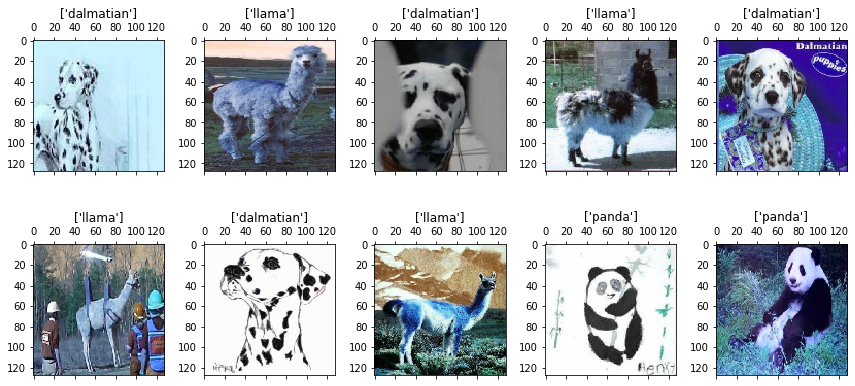

In [57]:
disp_image(X_train,y_train)

In [58]:
model = Sequential(name='DCN')

# Defining Input layer (shape of data)

* shape of input = 128 x 128 x 3

In [59]:
model.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]),name='Input-layer'))

### Convolutional Layer - 1  
* filter size = 3 x 3 x 3
* number of filters = 16
* stride = 1

### Max Pool Layer - 1 
* pool size = 2 x 2
* stride = 1

In [60]:
model.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 name='Conv-layer1'))

model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2),
                    padding='same',
                    name='MaxPool-layer1'))

model.add(Dropout(0.2))

### Convolutional Layer - 2  
* filter size = 3 x 3 x 3
* number of filters = 64
* stride = 1

### Max Pool Layer - 2 
* pool size = 2 x 2
* stride = 1

In [61]:
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 name='Conv-layer2'))

model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2),
                    padding='same',
                    name='MaxPool-layer2'))

model.add(Dropout(0.2))

### Convolutional Layer - 3  
* filter size = 3 x 3 x 3
* number of filters = 64
* stride = 1

### Max Pool Layer - 3 
* pool size = 2 x 2
* stride = 1

In [62]:
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu',
                 name='Conv-layer3'))

model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2),
                    padding='same',
                    name='MaxPool-layer3'))

model.add(Dropout(0.2))

### 1 Flatten Layer + 2 Fully connected layer + 1 output layer

In [63]:
model.add(Flatten(name='Flatten-Layer'))
model.add(Dense(16,activation='relu',name='Hidden-layer1'))
model.add(BatchNormalization())
model.add(Dense(16,activation='relu',name='Hidden-layer2'))
model.add(BatchNormalization())
model.add(Dense(4,activation='softmax',name='Output-layer'))

In [64]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [65]:
model_run = model.fit(X_train,y_train,epochs=100,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - ETA: 0s - loss: 1.5733 - accuracy: 0.2848WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C5FF8878B8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

In [66]:
def plot_acc(model_run):
    plt.figure(figsize=(15,8))
    epochs = range(1,101)
    train_accuracy = model_run.history['accuracy']
    val_accuracy = model_run.history['val_accuracy']
    sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
    plt.title('Accuracy v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

In [67]:
def plot_loss(model_run):
    plt.figure(figsize=(15,8))
    epochs = range(1,101)
    train_loss = model_run.history['loss']
    val_loss = model_run.history['val_loss']
    sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
    plt.title('Loss v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

C:\Users\91700\anaconda3\envs\myspecialenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\91700\anaconda3\envs\myspecialenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


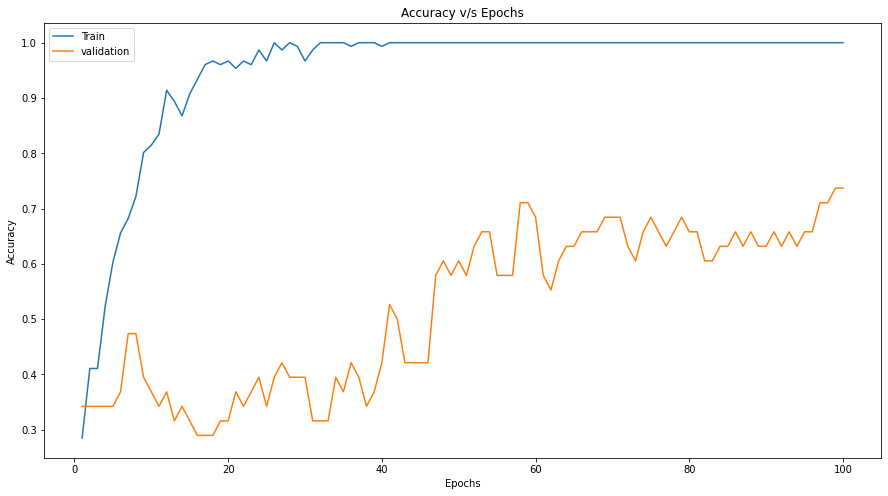

In [68]:
plot_acc(model_run)

C:\Users\91700\anaconda3\envs\myspecialenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\91700\anaconda3\envs\myspecialenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


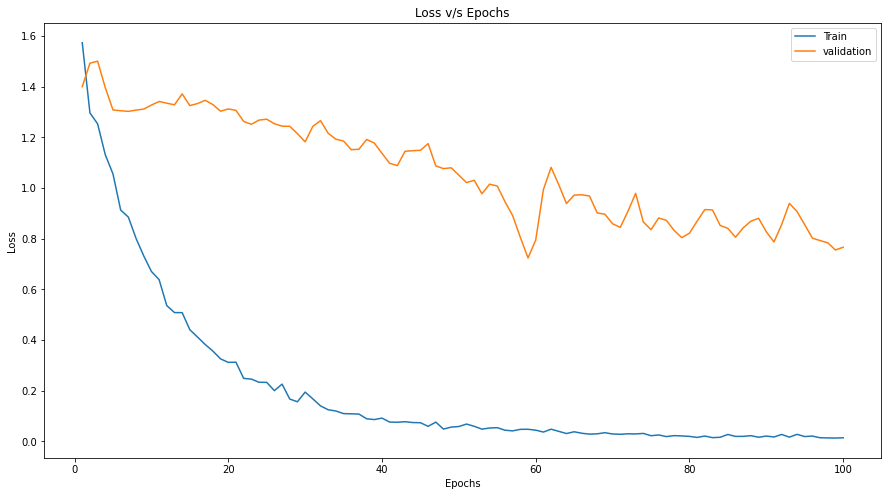

In [69]:
plot_loss(model_run)

In [70]:
def acc_evaluation(model,X,y):
    eva = model.evaluate(X,y)
    return np.round(eva[1]*100,2)

def loss_evaluation(model,X,y):
    eva = model.evaluate(X,y)
    return np.round(eva[0],5)

In [71]:
acc_evaluation(model,X_test,y_test)

2/2 [==============================] - 0s 55ms/step - loss: 0.5873 - accuracy: 0.7708


77.08

In [72]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [73]:
encoder.inverse_transform(np.array(np.argmax(y_pred[0])).reshape(-1,1))[0][0]

'llama'

In [74]:
X_test.shape

(48, 128, 128, 3)

In [75]:
def predict_image(index):
    plt.matshow(X_test[index])
    plt.title(encoder.inverse_transform(y_test)[index])
    print('predicted item name ::: ',encoder.inverse_transform(np.array(np.argmax(y_pred[index])).reshape(-1,1))[0][0])

predicted item name :::  hedgehog


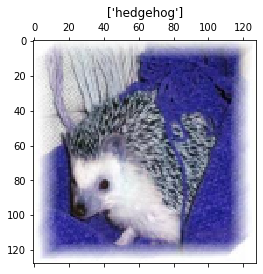

In [76]:
predict_image(11)

In [77]:
predicted_labels = np.argmax(model.predict(X_test),axis=1)

In [78]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.83      0.56      0.67        18
         1.0       0.76      0.94      0.84        17
         2.0       0.67      1.00      0.80         8
         3.0       1.00      0.60      0.75         5

    accuracy                           0.77        48
   macro avg       0.82      0.77      0.76        48
weighted avg       0.80      0.77      0.76        48

